In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV đã trích xuất keypoint
df = pd.read_csv(r"D:\NLP_VSL\hand_keypoints_dataset_total.csv")


In [12]:

print(df['label'].unique())  # Toàn bộ nhãn
print(sorted(df['label'].unique()))  # Sắp xếp xem có ký tự lạ nào

# Gợi ý 1: Kiểm tra phân bố số lượng mẫu theo từng nhãn
label_counts = df['label'].value_counts().sort_index()



['A' 'B' 'C' 'D' 'E' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'X' 'Y' 'Đ']
['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Đ']


In [13]:


print("Số mẫu:", len(df))
print("Các nhãn lớp:", df['label'].unique())

# Tách nhãn và đặc trưng
X = df.drop('label', axis=1).values  # 63 đặc trưng (x0, y0, z0,...)
y = df['label'].values

# Mã hóa nhãn từ A,B,C,... thành số
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# --- Lưu encoder để dự đoán sau này ---
os.makedirs("saved_model", exist_ok=True)
joblib.dump(label_encoder, "saved_model/label_encoder.pkl")



Số mẫu: 45264
Các nhãn lớp: ['A' 'B' 'C' 'D' 'E' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'X' 'Y' 'Đ']


['saved_model/label_encoder.pkl']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    shuffle=True,
    random_state=42
)

In [15]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# joblib.dump(scaler, "saved_model/scaler.pkl")

In [16]:
print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (36211, 63)
Test: (9053, 63)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(rf_model, "saved_model/rf_model.h5")

['saved_model/rf_model.h5']

In [22]:
y_pred = rf_model.predict(X_test)

print("\n--- Accuracy ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n--- Classification Report ---")
print(classification_report(
    y_test, 
    y_pred, 
    target_names=label_encoder.classes_,
    digits=4   # hiển thị 4 chữ số sau dấu phẩy
))


--- Accuracy ---
Accuracy: 0.9985

--- Classification Report ---
              precision    recall  f1-score   support

           A     1.0000    0.9943    0.9972       352
           B     0.9977    1.0000    0.9989       439
           C     0.9963    1.0000    0.9981       268
           D     1.0000    1.0000    1.0000       376
           E     1.0000    1.0000    1.0000       442
           G     1.0000    1.0000    1.0000       439
           H     0.9954    1.0000    0.9977       434
           I     1.0000    0.9977    0.9989       443
           K     1.0000    0.9957    0.9978       460
           L     1.0000    1.0000    1.0000       442
           M     0.9927    0.9963    0.9945       272
           N     0.9962    0.9962    0.9962       265
           O     0.9973    1.0000    0.9987       376
           P     1.0000    0.9896    0.9948       386
           Q     0.9909    0.9939    0.9924       328
           R     0.9953    1.0000    0.9977       428
           S   

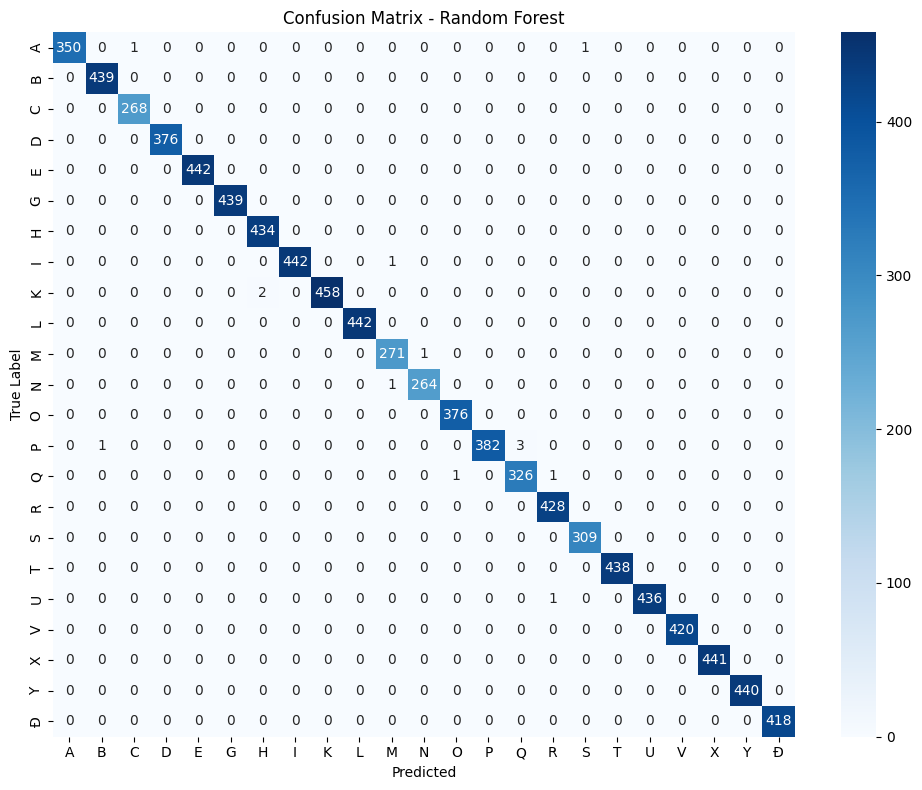

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

In [21]:
# import os
# import cv2
# import numpy as np
# import mediapipe as mp
# import joblib
# import matplotlib.pyplot as plt
# # === Load mô hình, scaler và label encoder ===
# model = joblib.load("saved_model/rf_model.h5")
# scaler = joblib.load("saved_model/scaler.pkl")
# label_encoder = joblib.load("saved_model/label_encoder.pkl")

# # === Khởi tạo MediaPipe để phát hiện tay ===
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(
#     static_image_mode=True, 
#     max_num_hands=1, 
#     min_detection_confidence=0.7
# )

# # === Hàm trích xuất keypoint từ ảnh ===
# def extract_keypoints_from_image(image_path):
#     image = cv2.imread(image_path)
#     if image is None:
#         return None, None

#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = hands.process(image_rgb)

#     if results.multi_hand_landmarks:
#         hand_landmarks = results.multi_hand_landmarks[0]
#         keypoints = []
#         for lm in hand_landmarks.landmark:
#             keypoints.extend([lm.x, lm.y, lm.z])  # mỗi điểm có x, y, z
#         return np.array(keypoints), image_rgb
#     else:
#         return None, image_rgb

# # === Hàm dự đoán và hiển thị kết quả ===
# def predict_and_display(image_path):
#     keypoints, image_rgb = extract_keypoints_from_image(image_path)
#     filename = os.path.basename(image_path)

#     if keypoints is None:
#         print(f"{filename} →  Không phát hiện bàn tay.")
#         return

#     # Chuẩn hóa và reshape đúng định dạng
#     keypoints_scaled = scaler.transform(keypoints.reshape(1, -1))  # (1, 63)
#     predicted_index = model.predict(keypoints_scaled)[0]
#     predicted_label = label_encoder.inverse_transform([predicted_index])[0]
#     prediction_proba = model.predict_proba(keypoints_scaled)[0]
#     confidence = prediction_proba[predicted_index] * 100

#     # In kết quả
#     print(f"\n Ảnh: {filename}")
#     print(f" Dự đoán: {predicted_label} ({confidence:.2f}%)")
#     print(f" Xác suất các lớp: {np.round(prediction_proba * 100, 2)}")

#     # Hiển thị ảnh với kết quả
#     plt.imshow(image_rgb)
#     plt.axis('off')
#     plt.title(f"{filename}\n→ {predicted_label} ({confidence:.2f}%)", fontsize=14)
#     plt.show()

# # === Duyệt toàn bộ thư mục ảnh test ===
# test_folder = r"D:\NLP_VSL\demo"

# print("\nDự đoán ảnh trong thư mục:")
# for img_file in os.listdir(test_folder):
#     if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
#         img_path = os.path.join(test_folder, img_file)
#         predict_and_display(img_path)
